# Lab | Random Forests

### 1. Get ready

#### 1.1 Import libraries

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

#### 1.2 Import Datasets

In [2]:
numerical = pd.read_csv('numerical.csv')
categorical = pd.read_csv('categorical.csv')
targets = pd.read_csv('target.csv')

In [3]:
numerical.head()

TCODE        AGE  INCOME  WEALTH1  HIT  MALEMILI  MALEVET  VIETVETS  \
0      0  60.000000       5        9    0         0       39        34   
1      1  46.000000       6        9   16         0       15        55   
2      1  61.611649       3        1    2         0       20        29   
3      0  70.000000       1        4    2         0       23        14   
4      0  78.000000       3        2   60         1       28         9   

   WWIIVETS  LOCALGOV  STATEGOV  FEDGOV  WEALTH2  POP901  POP902  POP903  \
0        18        10         2       1        5     992     264     332   
1        11         6         2       1        9    3611     940     998   
2        33         6         8       1        1    7001    2040    2669   
3        31         3         0       3        0     640     160     219   
4        53        26         3       2        9    2520     627     761   

   POP90C1  POP90C2  POP90C3  POP90C4  POP90C5  ETH1  ETH2  ETH3  ETH4  ETH5  \
0        0       35       65       47       53    92     1     0     0    11   
1       99        0        0       50       50    67     0     0    31     6   
2        0        2       98       49       51    96     2     0     0     2   
3        0        8       92       54       46    61     0     0    11    32   
4       99        0        0       46       54     2    98     0     0     1   

   ETH6  ETH7  ETH8  ETH9  ETH10  ETH11  ETH12  ETH13  ETH14  ETH15  ETH16  \
0     0     0     0     0      0      0      0     11      0      0      0   
1     4     2     6     4     14      0      0      2      0      1      4   
2     0     0     0     0      0      0      0      2      0      0      0   
3     6     2     0     0      0      0      0     31      0      0      1   
4     0     0     0     0      0      0      0      0      0      0      0   

   AGE901  AGE902  AGE903  AGE904  AGE905  AGE906  AGE907  CHIL1  CHIL2  \
0      39      48      51      40      50      54      25     31     42   
1      34      41      43      32      42      45      32     33     46   
2      35      43      46      37      45      49      23     35     40   
3      32      40      44      34      43      47      25     45     35   
4      33      45      50      36      46      50      27     34     43   

   CHIL3  AGEC1  AGEC2  AGEC3  AGEC4  AGEC5  AGEC6  AGEC7  CHILC1  CHILC2  \
0     27     11     14     18     17     13     11     15      12      11   
1     21     13     14     33     23     10      4      2      11      16   
2     25     13     20     19     16     13     10      8      15      14   
3     20     15     25     17     17     12      7      7      20      17   
4     23     14     21     13     15     20     12      5      13      15   

   CHILC3  CHILC4  CHILC5  HHAGE1  HHAGE2  HHAGE3  HHN1  HHN2  HHN3  HHN4  \
0      34      25      18      26      10      23    18    33    49    28   
1      36      22      15      12       1       5     4    21    75    55   
2      30      22      19      25      10      23    21    35    44    22   
3      30      14      19      25      11      23    23    27    50    30   
4      34      19      19      31       7      27    16    26    57    36   

   HHN5  HHN6  MARR1  MARR2  MARR3  MARR4  HHP1  HHP2  DW1  DW2  DW3  DW4  \
0    12     4     61      7     12     19   198   276   97   95    2    2   
1    23     9     69      4      3     24   317   360   99   99    0    0   
2     6     2     63      9      9     19   183   254   69   69    1    6   
3    15     8     63      9      6     23   199   283   85   83    3    4   
4    24    14     42     17      9     33   235   323   99   98    0    0   

   DW5  DW6  DW7  DW8  DW9   HV1   HV2  HV3  HV4  HU1  HU2  HU3  HU4  HU5  \
0    0    0    7    7    0   479   635    3    2   86   14   96    4    7   
1    0    0    0    0    0  5468  5218   12   10   96    4   97    3    9   
2    5    3    3    3    0   497   546    2    1   78   22   93    7   18   
3  

In [4]:
categorical.head()

STATE  CLUSTER HOMEOWNR GENDER  DATASRCE RFA_2R RFA_2A GEOCODE2 DOMAIN_A  \
0    IL       36        H      F         3      L      E        C        T   
1    CA       14        H      M         3      L      G        A        S   
2    NC       43        U      M         3      L      E        C        R   
3    CA       44        U      F         3      L      E        C        R   
4    FL       16        H      F         3      L      F        A        S   

   DOMAIN_B  ODATEW_YR  ODATEW_MM  DOB_YR  DOB_MM  MINRDATE_YR  MINRDATE_MM  \
0         2         89          1      37      12           92            8   
1         1         94          1      52       2           93           10   
2         2         90          1       0       2           91           11   
3         2         87          1      28       1           87           11   
4         2         86          1      20       1           93           10   

   MAXRDATE_YR  MAXRDATE_MM  LASTDATE_YR  LASTDATE_MM  FIRSTDATE_YR  \
0           94            2           95           12            89   
1           95           12           95           12            93   
2           92            7           95           12            90   
3           94           11           95           12            87   
4           96            1           96            1            79   

   FIRSTDATE_MM  
0            11  
1            10  
2             1  
3             2  
4             3

In [5]:
targets.head()

TARGET_B  TARGET_D
0         0       0.0
1         0       0.0
2         0       0.0
3         0       0.0
4         0       0.0

In [6]:
numerical['INCOME'] = numerical['INCOME'].astype('object')

In [7]:
numerical['WEALTH1'] = numerical['WEALTH1'].astype('object')

In [8]:
numerical['WEALTH2'] = numerical['WEALTH2'].astype('object')

In [9]:
numerical['HPHONE_D'] = numerical['HPHONE_D'].astype('object')

In [10]:
numerical['RFA_2F'] = numerical['RFA_2F'].astype('object')

In [11]:
# Drop some categorical values

In [12]:
categorical = categorical.drop(['ODATEW_YR', 'ODATEW_MM','DOB_YR','DOB_MM', 'MINRDATE_YR', 'MAXRDATE_YR','LASTDATE_YR', 'FIRSTDATE_YR', 'FIRSTDATE_MM'], axis = 1)

In [62]:
categorical = categorical[['STATE', 'HOMEOWNR', 'GENDER', 'RFA_2A', 'GEOCODE2', 'DOMAIN_A','DOMAIN_B']]

### 2. Random Forest

In [63]:
# Concat all the datasets in order to do random forest
data = pd.concat([numerical, categorical, targets], axis = 1)
data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [64]:
# Double check if everything is clean
data.isna().sum().sum()

0

#### 2.1 Preparing the model

In [65]:
# Leave the TARGET_D in X
y = data['TARGET_B']
X = data.drop(['TARGET_B'], axis = 1)

In [66]:
numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(np.object)

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(categoricalX)
encoded_categorical = encoder.transform(categoricalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
X = pd.concat([numericalX, encoded_categorical], axis = 1)
X.columns = X.columns.astype(str)

In [67]:
# train/ test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [68]:
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

(76329, 364)

(76329,)

(19083, 364)

(19083,)

#### 2.2 Upsampling

In [69]:
trainset = pd.concat([X_train, y_train], axis=1)

In [70]:
# Split my data into category 0 and category 1. I do that to tackle imbalance

category_0 = trainset[trainset['TARGET_B'] == 0]
category_1 = trainset[trainset['TARGET_B'] == 1]

In [71]:
category_1_oversampled = resample(category_1, #end up with duplicates
                                  replace=True, # Needs to be true because we don't have enough samples
                                  n_samples = len(category_0)) #

In [72]:
print(category_0.shape)
print(category_1_oversampled.shape)

(72486, 365)
(72486, 365)


In [73]:
data_upsampled = pd.concat([category_0, category_1_oversampled], axis=0)

In [74]:
data_upsampled = data_upsampled.sample(frac =1) #randomize the rows

In [75]:
X_train = data_upsampled.drop(['TARGET_B'], axis=1)
y_train = data_upsampled['TARGET_B']

In [76]:
# Seperate TARGET D from the whole set

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

y_train_regression = X_train['TARGET_D']
y_test_regression = X_test['TARGET_D']

# Now we can remove the column target d from the set of features
X_train = X_train.drop(['TARGET_D'], axis = 1)
X_test = X_test.drop(['TARGET_D'], axis = 1)

In [77]:
X_train.dtypes

TCODE         int64
AGE         float64
HIT           int64
MALEMILI      int64
MALEVET       int64
             ...   
47          float64
48          float64
49          float64
50          float64
51          float64
Length: 363, dtype: object

#### 2.3. Running the model

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.2,
                             random_state = 42)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0.6165949286758823
0.6035214588901117


0    18083
1     1000
Name: TARGET_B, dtype: int64

array([[10968,  7115],
       [  451,   549]])

**We would send out 1000 emails and get 549 donations**

### 3. Feature Selection

#### 3.1 Categoricals

In [79]:
# We already did that for the categoricals - they are ready to go
encoded_categorical

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0      0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2      0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
4      0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
95407  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
95408  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
95409  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
95410  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
95411  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   

        14   15   16   17   18   19   20   21   22   23   24   25   26   27  \
0      1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
1      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0   
2      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
95407  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
95408  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   
95409  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0   
95410  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
95411  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   

        28   29   30   31   32   33   34   35   36   37   38   39   40   41  \
0      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
4      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
95407  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
95408  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
95409  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
95410  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
95411  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   

        42   43   44   45   46   47   48   49   50   51  
0      1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  
1      0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
2      1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  
3      1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  
4      0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
95407  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
95408  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
95409  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
95410  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
95411  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  

[95412 rows x 52 columns]

#### 3.2 Numericals

#### 3.2.1 Scale

In [80]:
numericalX = X.select_dtypes(np.number)

In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(numericalX)

#### 3.2.2 VarianceThreshold

In [82]:
from sklearn.feature_selection import VarianceThreshold 
var_threshold = 0.10 #value between 0 and 1. Experiment with the value, how high should the variance be?
sel = VarianceThreshold(threshold=(var_threshold)) #var_threshold in () to say that we want to use it for every column, could also do it for each column individually

# 1) default is threshold = 0 :eliminate all coumns that are identical for all rows
# 2) in practice we would scale the columns first, and then apply threshold, or apply 
#    a different threshold for different columns

# This drops the columns that have a variance less than this threshold
sel = sel.fit(numerical_scaled)
temp = sel.transform(numerical_scaled)
temp = pd.DataFrame(temp)
print(numerical_scaled.shape)
print(temp.shape)

(95412, 364)
(95412, 35)


In [83]:
pd.DataFrame(temp).head()

0         1         2         3         4         5         6         7   \
0  0.0  0.656566  0.070707  0.131313  0.272727  0.020202  0.050505  0.171717   
1  1.0  0.000000  0.989899  0.989899  0.989899  0.919192  0.919192  0.919192   
2  0.0  0.989899  0.010101  0.060606  0.181818  0.000000  0.020202  0.090909   
3  0.0  0.929293  0.252525  0.505051  0.696970  0.010101  0.080808  0.171717   
4  1.0  0.000000  0.010101  0.020202  0.161616  0.252525  0.585859  0.747475   

    8         9         10        11        12   13   14   15   16   17   18  \
0  0.0  0.313131  0.545455  0.909091  0.404040  0.0  0.0  1.0  1.0  0.0  0.0   
1  1.0  0.979798  1.000000  0.969697  1.000000  0.0  0.0  0.0  1.0  1.0  0.0   
2  1.0  0.505051  0.696970  0.000000  0.171717  0.0  0.0  0.0  0.0  0.0  1.0   
3  1.0  0.393939  0.454545  0.454545  0.222222  0.0  0.0  0.0  0.0  0.0  1.0   
4  1.0  0.060606  0.333333  0.090909  0.212121  0.0  0.0  0.0  0.0  1.0  1.0   

    19   20   21   22   23   24   25   26   27   28   29   30   31   32   33  \
0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
1  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
2  0.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0   
3  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0   
4  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   

    34  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0

In [84]:
encoded_categorical

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0      0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2      0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
4      0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
95407  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
95408  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
95409  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
95410  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
95411  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   

        14   15   16   17   18   19   20   21   22   23   24   25   26   27  \
0      1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
1      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0   
2      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
95407  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
95408  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   
95409  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0   
95410  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
95411  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   

        28   29   30   31   32   33   34   35   36   37   38   39   40   41  \
0      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
4      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
95407  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
95408  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
95409  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
95410  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
95411  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   

        42   43   44   45   46   47   48   49   50   51  
0      1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  
1      0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
2      1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  
3      1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  
4      0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
95407  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
95408  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
95409  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
95410  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
95411  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  

[95412 rows x 52 columns]

##### Bring the data together again

In [85]:
X = pd.concat([temp, encoded_categorical], axis = 1)

In [86]:
y

0        0
1        0
2        0
3        0
4        0
        ..
95407    0
95408    0
95409    0
95410    1
95411    0
Name: TARGET_B, Length: 95412, dtype: int64

### 4. Upsampling

In [87]:
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X, y, test_size=0.2, random_state=0)

display(X_train_fs.shape)
display(y_train_fs.shape)
display(X_test_fs.shape)
display(y_test_fs.shape)

(76329, 87)

(76329,)

(19083, 87)

(19083,)

In [88]:
trainset_fs = pd.concat([X_train_fs, y_train_fs], axis=1)

In [89]:
# Split my data into category 0 and category 1. I do that to tackle imbalance

category_0_fs = trainset_fs[trainset_fs['TARGET_B'] == 0]
category_1_fs = trainset_fs[trainset_fs['TARGET_B'] == 1]

In [90]:
category_1_oversampled_fs = resample(category_1_fs, #end up with duplicates
                                  replace=True, # Needs to be true because we don't have enough samples
                                  n_samples = len(category_0_fs)) #

In [91]:
print(category_0_fs.shape)
print(category_1_oversampled_fs.shape)

(72486, 88)
(72486, 88)


In [92]:
data_upsampled_fs = pd.concat([category_0_fs, category_1_oversampled_fs], axis=0)
data_upsampled_fs = data_upsampled_fs.sample(frac =1) #randomize the rows
data_upsampled_fs

0        1         2         3         4         5         6  \
42276  0.000000  1.00000  0.010101  0.080808  0.212121  0.080808  0.262626   
71626  0.000000  1.00000  0.000000  0.040404  0.121212  0.010101  0.050505   
41877  0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
44949  1.000000  0.00000  0.030303  0.252525  0.737374  0.181818  0.585859   
94582  0.000000  1.00000  0.282828  0.565657  0.757576  0.131313  0.151515   
...         ...      ...       ...       ...       ...       ...       ...   
57821  1.000000  0.00000  0.898990  0.989899  0.989899  0.868687  0.878788   
66458  1.000000  0.00000  0.838384  0.969697  0.989899  0.757576  0.848485   
39495  0.606061  0.40404  0.000000  0.000000  0.020202  0.000000  0.050505   
90420  0.000000  1.00000  0.020202  0.090909  0.282828  0.010101  0.050505   
62110  0.000000  0.00000  0.000000  0.030303  0.191919  0.000000  0.202020   

              7         8         9        10        11        12   13   14  \
42276  0.494949  0.969697  0.636364  0.787879  0.838384  0.777778  1.0  0.0   
71626  0.171717  1.000000  0.393939  0.575758  0.121212  0.030303  1.0  0.0   
41877  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0   
44949  0.858586  0.868687  0.929293  0.979798  0.939394  0.989899  0.0  1.0   
94582  0.333333  1.000000  0.808081  0.878788  0.000000  0.000000  1.0  0.0   
...         ...       ...       ...       ...       ...       ...  ...  ...   
57821  0.898990  1.000000  0.707071  0.979798  0.939394  1.000000  0.0  0.0   
66458  0.868687  1.000000  0.000000  0.020202  0.959596  1.000000  0.0  0.0   
39495  0.101010  1.000000  0.353535  0.383838  0.686869  0.525253  1.0  0.0   
90420  0.262626  0.929293  0.707071  0.838384  0.393939  0.232323  0.0  0.0   
62110  0.606061  1.000000  0.575758  0.696970  0.969697  1.000000  0.0  1.0   

        15   16   17   18   19   20   21   22   23   24   25   26   27   28  \
42276  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
71626  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0   
41877  1.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
44949  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0   
94582  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
57821  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
66458  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   
39495  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   
90420  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
62110  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0   

        29   30   31   32   33   34    0    1    2    3    4    5    6    7  \
42276  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
71626  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
41877  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
44949  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
94582  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
57821  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
66458  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
39495  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
90420  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
62110  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   

         8    9   10   11   12   13   14   15   16   17   18   19   20   21  \
42276  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
71626  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  

In [93]:
X_train_fs = data_upsampled_fs.drop(['TARGET_B'], axis=1)
y_train_fs = data_upsampled_fs['TARGET_B']

## Running the model

In [94]:
clf_fs = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.2,
                             random_state = 42)
clf_fs.fit(X_train_fs, y_train_fs)
print(clf_fs.score(X_train_fs, y_train_fs))
print(clf_fs.score(X_test_fs, y_test_fs))

y_pred_fs = clf_fs.predict(X_test_fs)
display(y_test_fs.value_counts())
display(confusion_matrix(y_test_fs, y_pred_fs))

0.5953908340921006
0.6048839281035476


0    18083
1     1000
Name: TARGET_B, dtype: int64

array([[10999,  7084],
       [  456,   544]])

In [95]:
# Confusion matrix will all of the features
display(confusion_matrix(y_test, y_pred))

array([[10968,  7115],
       [  451,   549]])

In [96]:
y_pred

array([1, 0, 0, ..., 0, 1, 1])

**COMMENT:** Same result with all the features. But as we want to have a model that works well with as little features as possible I will continue with the smaller dataset.

In [97]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model3 = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.2,
                             random_state = 42)

model_pipeline = [model1, model2, model3]
model_names = ['Decision Tree Classifier', 'Logistic Regression', 'Random Forest Classifier']
scores = {} #building a dictionary of scores to look at them later
for model, model_name in zip(model_pipeline, model_names): # it works like an interation and we can zip through them
    mean_score = (cross_val_score(model, X_train_fs, y_train_fs, cv=5)).mean()
    scores[model_name] = mean_score
print(scores)

# for model in model_pipeline:
#     y_pred_fs = model.predict(X_test_fs)
#     confusion_matrix(y_test_fs, y_pred_fs)

{'Decision Tree Classifier': 0.9650898105789303, 'Logistic Regression': 0.5863752893294143, 'Random Forest Classifier': 0.5921005161731793}


In [98]:
for model in model_pipeline:
    model.fit(X_train_fs, y_train_fs)
    y_pred_fs = model.predict(X_test_fs)
    print("Confusion matrix for", model)
    display(confusion_matrix(y_test_fs, y_pred_fs))

Confusion matrix for DecisionTreeClassifier()


array([[17039,  1044],
       [  939,    61]])

Confusion matrix for LogisticRegression()


array([[11144,  6939],
       [  466,   534]])

Confusion matrix for RandomForestClassifier(max_depth=5, max_samples=0.2, min_samples_leaf=20,
                       min_samples_split=20, random_state=42)


array([[10999,  7084],
       [  456,   544]])

**Discussion:**
Even though the decision tree provides me with a higher accuracy, I will move forward with the logistic regression or randomForestClassifier. In both models I am able to predict over 50% of the donors that donate correctly. Those are the ones I am actually interested in. Considering the overall accuracy I would go with the Logistic regression model and work on it. 

### Prepare for the final regression model

In [99]:
final_y = pd.DataFrame(targets['TARGET_B'])
final_data = pd.concat([temp, encoded_categorical], axis = 1)
display(final_y.shape)
display(final_data.shape)
final_y.head()

(95412, 1)

(95412, 87)

TARGET_B
0         0
1         0
2         0
3         0
4         0

In [100]:
final_data.columns = final_data.columns.astype(str)

In [101]:
final_y['pred_TARGET_B'] = clf_fs.predict(final_data)

In [102]:
final_y.shape

(95412, 2)

In [104]:
final_data_y_pred = pd.concat([final_data, final_y], axis = 1)

In [105]:
display(final_data_y_pred.shape)
final_data_y_pred.head()

(95412, 89)

0         1         2         3         4         5         6         7  \
0  0.0  0.656566  0.070707  0.131313  0.272727  0.020202  0.050505  0.171717   
1  1.0  0.000000  0.989899  0.989899  0.989899  0.919192  0.919192  0.919192   
2  0.0  0.989899  0.010101  0.060606  0.181818  0.000000  0.020202  0.090909   
3  0.0  0.929293  0.252525  0.505051  0.696970  0.010101  0.080808  0.171717   
4  1.0  0.000000  0.010101  0.020202  0.161616  0.252525  0.585859  0.747475   

     8         9        10        11        12   13   14   15   16   17   18  \
0  0.0  0.313131  0.545455  0.909091  0.404040  0.0  0.0  1.0  1.0  0.0  0.0   
1  1.0  0.979798  1.000000  0.969697  1.000000  0.0  0.0  0.0  1.0  1.0  0.0   
2  1.0  0.505051  0.696970  0.000000  0.171717  0.0  0.0  0.0  0.0  0.0  1.0   
3  1.0  0.393939  0.454545  0.454545  0.222222  0.0  0.0  0.0  0.0  0.0  1.0   
4  1.0  0.060606  0.333333  0.090909  0.212121  0.0  0.0  0.0  0.0  1.0  1.0   

    19   20   21   22   23   24   25   26   27   28   29   30   31   32   33  \
0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
1  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
2  0.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0   
3  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0   
4  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   

    34    0    1    2    3    4    5    6    7    8    9   10   11   12   13  \
0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   

    14   15   16   17   18   19   20   21   22   23   24   25   26   27   28  \
0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
2  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  1.0   

    29   30   31   32   33   34   35   36   37   38   39   40   41   42   43  \
0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   

    44   45   46   47   48   49   50   51  TARGET_B  pred_TARGET_B  
0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0         0              1  
1  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0         0              0  
2  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0         0              1  
3  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0         0              1  
4  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0         0              0

In [106]:
#save intermediate results:
final_data_y_pred.to_csv('final_data_y_pred.csv', index=False)

# Lab | Final regression model in "Health Care for All" Case

In [123]:
pd.DataFrame(y_pred_fs).value_counts()

0    11455
1     7628
dtype: int64

In [124]:
data

TCODE        AGE INCOME WEALTH1  HIT  MALEMILI  MALEVET  VIETVETS  \
0          0  60.000000      5       9    0         0       39        34   
1          1  46.000000      6       9   16         0       15        55   
2          1  61.611649      3       1    2         0       20        29   
3          0  70.000000      1       4    2         0       23        14   
4          0  78.000000      3       2   60         1       28         9   
...      ...        ...    ...     ...  ...       ...      ...       ...   
95407      1  61.611649      5       9    0        14       36        47   
95408      1  48.000000      7       9    1         0       31        43   
95409      1  60.000000      5       9    0         0       18        46   
95410      0  58.000000      7       9    0         0       28        35   
95411      2  80.000000      5       8    3         1       33        22   

       WWIIVETS  LOCALGOV  STATEGOV  FEDGOV WEALTH2  POP901  POP902  POP903  \
0            18        10         2       1       5     992     264     332   
1            11         6         2       1       9    3611     940     998   
2            33         6         8       1       1    7001    2040    2669   
3            31         3         0       3       0     640     160     219   
4            53        26         3       2       9    2520     627     761   
...         ...       ...       ...     ...     ...     ...     ...     ...   
95407        11         7         8      13       9   27380    7252   10037   
95408        19         4         1       0       9    1254     322     361   
95409        20         7        23       0       9     552     131     205   
95410        20         9         1       1       7    1746     432     508   
95411        27         8        10       3       8    3935    1192    1342   

       POP90C1  POP90C2  POP90C3  POP90C4  POP90C5  ETH1  ETH2  ETH3  ETH4  \
0            0       35       65       47       53    92     1     0     0   
1           99        0        0       50       50    67     0     0    31   
2            0        2       98       49       51    96     2     0     0   
3            0        8       92       54       46    61     0     0    11   
4           99        0        0       46       54     2    98     0     0   
...        ...      ...      ...      ...      ...   ...   ...   ...   ...   
95407       99        0        0       50       50    78    10     6     4   
95408       96        0        4       51       49    91     3     0     2   
95409       99        0        0       53       47    82    14     0     1   
95410       99        0        0       47       53    92     1     1     5   
95411       99        0        0       48       52    86    12     0     1   

       ETH5  ETH6  ETH7  ETH8  ETH9  ETH10  ETH11  ETH12  ETH13  ETH14  ETH15  \
0        11     0     0     0     0      0      0      0     11      0      0   
1         6     4     2     6     4     14      0      0      2      0      1   
2         2     0     0     0     0      0      0      0      2      0      0   
3        32     6     2     0     0      0      0      0     31      0      0   
4         1     0     0     0     0      0      0      0      0      0      0   
...     ...   ...   ...   ...   ...    ...    ...    ...    ...    ...    ...   
95407     5     0     0     0     1      1      0      0      3      1      0   
95408     6     1     0     1     0      0      0      0      5      0      0   
95409     9     0     0     0     0      0      0      0      9      0      0   
95410     8     0     1     2     0      1      0      0      5      0      0   
95411     1     0     0     0     0      0      0      0      0      0      0   

       ETH16  AGE901  AGE902  AGE903  AGE904  AGE905  AGE906  AGE907  CHIL1  \
0          0      39      48      51      40      50      54      25     31   
1          4      34      41      43      32      42      45      32     33  

In [125]:
data[data['TARGET_B']== 1]

TCODE        AGE INCOME WEALTH1  HIT  MALEMILI  MALEVET  VIETVETS  \
20         2  62.000000      3       8   10         2       25        40   
30         0  61.611649      5       9    0         1       37        58   
45         0  66.000000      5       9    5         0       33        24   
78         0  69.000000      6       9    0         0       34        20   
93         1  73.000000      1       7   10         0       21        53   
...      ...        ...    ...     ...  ...       ...      ...       ...   
95298      2  45.000000      5       9    0         0       45        28   
95309      0  51.000000      5       6    1         1       32        43   
95398      0  86.000000      5       9    0         1       32        21   
95403      0  58.000000      4       9    0         0       24        46   
95410      0  58.000000      7       9    0         0       28        35   

       WWIIVETS  LOCALGOV  STATEGOV  FEDGOV WEALTH2  POP901  POP902  POP903  \
20           27        11         4       1       9    2707     672     929   
30           16         8         1       5       9    2147     591     640   
45           39         6         5       1       9    2160     683     900   
78           54         2         3       1       9   13801    3736    6388   
93            8         5         4      11       7    1673     418     462   
...         ...       ...       ...     ...     ...     ...     ...     ...   
95298        37         9         2       3       2    2649     671    1098   
95309        24         7         5       6       6    8361    2324    3112   
95398        26         9         1       0       9    2368     651     930   
95403        20         6         1       2       5    1663     450     581   
95410        20         9         1       1       7    1746     432     508   

       POP90C1  POP90C2  POP90C3  POP90C4  POP90C5  ETH1  ETH2  ETH3  ETH4  \
20          99        0        0       45       55    97     1     0     2   
30          99        0        0       49       51    94     2     0     3   
45          89        0       11       48       52    99     0     0     1   
78          99        0        0       48       52    97     0     0     3   
93          99        0        0       49       51     7    93     0     0   
...        ...      ...      ...      ...      ...   ...   ...   ...   ...   
95298        0       99        1       46       54    94     1     1     1   
95309       99        0        0       50       50    90     1     1     7   
95398       99        0        0       50       50    85    12     0     3   
95403        0        1       99       50       50    99     0     0     0   
95410       99        0        0       47       53    92     1     1     5   

       ETH5  ETH6  ETH7  ETH8  ETH9  ETH10  ETH11  ETH12  ETH13  ETH14  ETH15  \
20        1     0     0     0     0      1      0      0      1      0      0   
30        5     1     0     1     1      0      0      0      3      0      0   
45        1     0     0     0     0      0      0      0      0      0      0   
78        3     0     1     1     0      0      0      0      2      0      0   
93        0     0     0     0     0      0      0      0      0      0      0   
...     ...   ...   ...   ...   ...    ...    ...    ...    ...    ...    ...   
95298     8     0     0     0     0      0      0      0      6      0      0   
95309     9     1     1     1     3      0      0      0      6      0      0   
95398     1     1     0     1     1      0      0      0      1      0      0   
95403     0     0     0     0     0      0      0      0      0      0      0   
95410     8     0     1     2     0      1      0      0      5      0      0   

       ETH16  AGE901  AGE902  AGE903  AGE904  AGE905  AGE906  AGE907  CHIL1  \
20         0      35      42      43      37      47      50      27     34   
30         2      29      36      37      27      38      40      37     46  

#### 1. Get the data for the people who donate

In [126]:
donation_data = data[data['TARGET_B'] == 1]
donation_data['TARGET_D'].mean()

15.624344414619037

In [127]:
y = donation_data['TARGET_D']
X = donation_data.drop(['TARGET_B', 'TARGET_D'], axis = 1)

In [128]:
X

TCODE        AGE INCOME WEALTH1  HIT  MALEMILI  MALEVET  VIETVETS  \
20         2  62.000000      3       8   10         2       25        40   
30         0  61.611649      5       9    0         1       37        58   
45         0  66.000000      5       9    5         0       33        24   
78         0  69.000000      6       9    0         0       34        20   
93         1  73.000000      1       7   10         0       21        53   
...      ...        ...    ...     ...  ...       ...      ...       ...   
95298      2  45.000000      5       9    0         0       45        28   
95309      0  51.000000      5       6    1         1       32        43   
95398      0  86.000000      5       9    0         1       32        21   
95403      0  58.000000      4       9    0         0       24        46   
95410      0  58.000000      7       9    0         0       28        35   

       WWIIVETS  LOCALGOV  STATEGOV  FEDGOV WEALTH2  POP901  POP902  POP903  \
20           27        11         4       1       9    2707     672     929   
30           16         8         1       5       9    2147     591     640   
45           39         6         5       1       9    2160     683     900   
78           54         2         3       1       9   13801    3736    6388   
93            8         5         4      11       7    1673     418     462   
...         ...       ...       ...     ...     ...     ...     ...     ...   
95298        37         9         2       3       2    2649     671    1098   
95309        24         7         5       6       6    8361    2324    3112   
95398        26         9         1       0       9    2368     651     930   
95403        20         6         1       2       5    1663     450     581   
95410        20         9         1       1       7    1746     432     508   

       POP90C1  POP90C2  POP90C3  POP90C4  POP90C5  ETH1  ETH2  ETH3  ETH4  \
20          99        0        0       45       55    97     1     0     2   
30          99        0        0       49       51    94     2     0     3   
45          89        0       11       48       52    99     0     0     1   
78          99        0        0       48       52    97     0     0     3   
93          99        0        0       49       51     7    93     0     0   
...        ...      ...      ...      ...      ...   ...   ...   ...   ...   
95298        0       99        1       46       54    94     1     1     1   
95309       99        0        0       50       50    90     1     1     7   
95398       99        0        0       50       50    85    12     0     3   
95403        0        1       99       50       50    99     0     0     0   
95410       99        0        0       47       53    92     1     1     5   

       ETH5  ETH6  ETH7  ETH8  ETH9  ETH10  ETH11  ETH12  ETH13  ETH14  ETH15  \
20        1     0     0     0     0      1      0      0      1      0      0   
30        5     1     0     1     1      0      0      0      3      0      0   
45        1     0     0     0     0      0      0      0      0      0      0   
78        3     0     1     1     0      0      0      0      2      0      0   
93        0     0     0     0     0      0      0      0      0      0      0   
...     ...   ...   ...   ...   ...    ...    ...    ...    ...    ...    ...   
95298     8     0     0     0     0      0      0      0      6      0      0   
95309     9     1     1     1     3      0      0      0      6      0      0   
95398     1     1     0     1     1      0      0      0      1      0      0   
95403     0     0     0     0     0      0      0      0      0      0      0   
95410     8     0     1     2     0      1      0      0      5      0      0   

       ETH16  AGE901  AGE902  AGE903  AGE904  AGE905  AGE906  AGE907  CHIL1  \
20         0      35      42      43      37      47      50      27     34   
30         2      29      36      37      27      38      40      37     46  

### 1. Categoricals

In [129]:
X_cat = donation_data.select_dtypes(object)

In [130]:
X_cat

INCOME WEALTH1 WEALTH2 HPHONE_D RFA_2F  STATE HOMEOWNR GENDER RFA_2A  \
20         3       8       9        1      3  other        H      F      D   
30         5       9       9        1      3     TX        H      M      D   
45         5       9       9        1      3  other        H      F      D   
78         6       9       9        0      2     CA        H      F      F   
93         1       7       7        1      3     GA        H      M      E   
...      ...     ...     ...      ...    ...    ...      ...    ...    ...   
95298      5       9       2        0      1     CA        H      F      F   
95309      5       6       6        1      1     CA        H      F      F   
95398      5       9       9        0      3     WI        H      F      G   
95403      4       9       5        0      1  other        H      F      F   
95410      7       9       7        1      4     CA        H      F      F   

      GEOCODE2 DOMAIN_A  
20           A        S  
30           A        T  
45           C        C  
78           A        S  
93           A        S  
...        ...      ...  
95298        A        T  
95309        B        S  
95398        B        S  
95403        D        R  
95410        A        C  

[4843 rows x 11 columns]

In [131]:
# One Hot Encode and Ordinal Encoding

In [132]:
X_cat = X_cat.drop(['HPHONE_D'], axis = 1)

In [134]:
X_cat

INCOME WEALTH1 WEALTH2 RFA_2F  STATE HOMEOWNR GENDER RFA_2A GEOCODE2  \
20         3       8       9      3  other        H      F      D        A   
30         5       9       9      3     TX        H      M      D        A   
45         5       9       9      3  other        H      F      D        C   
78         6       9       9      2     CA        H      F      F        A   
93         1       7       7      3     GA        H      M      E        A   
...      ...     ...     ...    ...    ...      ...    ...    ...      ...   
95298      5       9       2      1     CA        H      F      F        A   
95309      5       6       6      1     CA        H      F      F        B   
95398      5       9       9      3     WI        H      F      G        B   
95403      4       9       5      1  other        H      F      F        D   
95410      7       9       7      4     CA        H      F      F        A   

      DOMAIN_A  
20           S  
30           T  
45           C  
78           S  
93           S  
...        ...  
95298        T  
95309        S  
95398        S  
95403        R  
95410        C  

[4843 rows x 10 columns]

##### One Hot Encode
- RFA_2F
- State
- Homeowner
- Gender
- RFA_2A
- Geocode
- Domain_A

In [135]:
onehot = X_cat.drop(['INCOME', 'WEALTH1', 'WEALTH2'], axis = 1)
onehot.head()

RFA_2F  STATE HOMEOWNR GENDER RFA_2A GEOCODE2 DOMAIN_A
20      3  other        H      F      D        A        S
30      3     TX        H      M      D        A        T
45      3  other        H      F      D        C        C
78      2     CA        H      F      F        A        S
93      3     GA        H      M      E        A        S

In [136]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(onehot)
onehot_encoded = encoder.transform(onehot).toarray()

In [137]:
onehot_encoded

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

##### Ordinal Encoding

In [138]:
ordinal = X_cat[['INCOME', 'WEALTH1', 'WEALTH2']]
ordinal.head()

INCOME WEALTH1 WEALTH2
20      3       8       9
30      5       9       9
45      5       9       9
78      6       9       9
93      1       7       7

In [139]:
encoded_categoricals = np.concatenate((onehot_encoded, ordinal), axis = 1)

In [140]:
pd.DataFrame(encoded_categoricals)

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0     0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
1     0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2     0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
3     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4     0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
4838  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4839  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4840  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
4841  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
4842  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       14   15   16   17   18   19   20   21   22   23   24   25   26 27 28 29  
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  3  8  9  
1     0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  5  9  9  
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  5  9  9  
3     0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  6  9  9  
4     0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1  7  7  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ... .. .. ..  
4838  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  5  9  2  
4839  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  5  6  6  
4840  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  5  9  9  
4841  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  4  9  5  
4842  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  7  9  7  

[4843 rows x 30 columns]

### 2. Numericals
#### 2. Create a OLS model to get information and do feature selection

In [141]:
# For this model we need the categorical values to be converted

In [142]:
X_num = donation_data.select_dtypes(np.number)
X_num = X_num.drop(['TARGET_D'], axis = 1)

In [143]:
# X_added_constant = sm.add_constant(X_num)
# X_added_constant #OLS - What do we need for? It is needed for the OLS model

# # Here we use the OLS model
# model = sm.OLS(y,X_added_constant).fit() 
# model.summary()

In [144]:
# Scale numericals
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(X_num)

In [145]:
X = numerical_scaled
#y = targets['TARGET_D']

from sklearn.feature_selection import RFE
from sklearn import linear_model
lm = linear_model.LinearRegression()
rfe = RFE(lm, n_features_to_select=20, verbose=False)
rfe.fit(X, y)

RFE(estimator=LinearRegression(), n_features_to_select=20, verbose=False)

In [146]:
df = pd.DataFrame(data = rfe.ranking_, columns=['Rank'])
df['Column_name'] = pd.DataFrame(X_num).columns
df
keep = df[df['Rank']<12]

keeper = list(keep['Column_name'])
keeper

['POP90C1',
 'POP90C2',
 'POP90C3',
 'ETH1',
 'ETH5',
 'ETH13',
 'ETH14',
 'ETH15',
 'ETH16',
 'DW7',
 'DW9',
 'HU2',
 'HHD1',
 'HHD4',
 'HHD7',
 'ETHC1',
 'ETHC2',
 'ETHC3',
 'HUPA4',
 'HUPA5',
 'HUPA6',
 'HUPA7',
 'MC1',
 'MC2',
 'RAMNTALL',
 'NGIFTALL',
 'MINRAMNT',
 'MAXRAMNT',
 'LASTGIFT',
 'AVGGIFT']

In [178]:
scaled_num = pd.DataFrame(numerical_scaled, columns=X_num.columns) 
scaled_num

TCODE       AGE       HIT  MALEMILI   MALEVET  VIETVETS  WWIIVETS  \
0     0.000051  0.617021  0.041667  0.020833  0.316456  0.404040  0.272727   
1     0.000000  0.612890  0.000000  0.010417  0.468354  0.585859  0.161616   
2     0.000000  0.659574  0.020833  0.000000  0.417722  0.242424  0.393939   
3     0.000000  0.691489  0.000000  0.000000  0.430380  0.202020  0.545455   
4     0.000026  0.734043  0.041667  0.000000  0.265823  0.535354  0.080808   
...        ...       ...       ...       ...       ...       ...       ...   
4838  0.000051  0.436170  0.000000  0.000000  0.569620  0.282828  0.373737   
4839  0.000000  0.500000  0.004167  0.010417  0.405063  0.434343  0.242424   
4840  0.000000  0.872340  0.000000  0.010417  0.405063  0.212121  0.262626   
4841  0.000000  0.574468  0.000000  0.000000  0.303797  0.464646  0.202020   
4842  0.000000  0.574468  0.000000  0.000000  0.354430  0.353535  0.202020   

      LOCALGOV  STATEGOV    FEDGOV    POP901    POP902    POP903  POP90C1  \
0     0.229167      0.08  0.016667  0.044224  0.044714  0.034357  1.00000   
1     0.166667      0.02  0.083333  0.035075  0.039324  0.023669  1.00000   
2     0.125000      0.10  0.016667  0.035288  0.045445  0.033284  0.89899   
3     0.041667      0.06  0.016667  0.225466  0.248586  0.236243  1.00000   
4     0.104167      0.08  0.183333  0.027332  0.027813  0.017086  1.00000   
...        ...       ...       ...       ...       ...       ...      ...   
4838  0.187500      0.04  0.050000  0.043277  0.044647  0.040607  0.00000   
4839  0.145833      0.10  0.100000  0.136593  0.154634  0.115089  1.00000   
4840  0.187500      0.02  0.000000  0.038686  0.043316  0.034393  1.00000   
4841  0.125000      0.02  0.033333  0.027168  0.029942  0.021487  0.00000   
4842  0.187500      0.02  0.016667  0.028524  0.028744  0.018787  1.00000   

       POP90C2   POP90C3   POP90C4   POP90C5      ETH1      ETH2      ETH3  \
0     0.000000  0.000000  0.454545  0.723684  0.979798  0.010101  0.000000   
1     0.000000  0.000000  0.494949  0.671053  0.949495  0.020202  0.000000   
2     0.000000  0.111111  0.484848  0.684211  1.000000  0.000000  0.000000   
3     0.000000  0.000000  0.484848  0.684211  0.979798  0.000000  0.000000   
4     0.000000  0.000000  0.494949  0.671053  0.070707  0.939394  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
4838  1.000000  0.010101  0.464646  0.710526  0.949495  0.010101  0.011111   
4839  0.000000  0.000000  0.505051  0.657895  0.909091  0.010101  0.011111   
4840  0.000000  0.000000  0.505051  0.657895  0.858586  0.121212  0.000000   
4841  0.010101  1.000000  0.505051  0.657895  1.000000  0.000000  0.000000   
4842  0.000000  0.000000  0.474747  0.697368  0.929293  0.010101  0.011111   

          ETH4      ETH5      ETH6      ETH7      ETH8      ETH9     ETH10  \
0     0.022222  0.010204  0.000000  0.000000  0.000000  0.000000  0.021739   
1     0.033333  0.051020  0.090909  0.000000  0.013889  0.023810  0.000000   
2     0.011111  0.010204  0.000000  0.000000  0.000000  0.000000  0.000000   
3     0.033333  0.030612  0.000000  0.017544  0.013889  0.000000  0.000000   
4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
4838  0.011111  0.081633  0.000000  0.000000  0.000000  0.000000  0.000000   
4839  0.077778  0.091837  0.090909  0.017544  0.013889  0.071429  0.000000   
4840  0.033333  0.010204  0.090909  0.000000  0.013889  0.023810  0.000000   
4841  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4842  0.055556  0.081633  0.000000  0.017544  0.027778  0.000000  0.021739   

      ETH11  ETH12     ETH13  ETH14  ETH15     ETH16    AGE901    AGE902  \
0       0.0    0.0  0.010870    0.0    0.0  0.000000  0.443038  0.531646   
1       0.0    0.0  0.032609    0.0    0.0  0.035088  0.367089  0.455696   
2       0.0    0.0  0.000000    0.0    0.0  0

In [148]:
feature_selection_num = scaled_num[scaled_num.columns[scaled_num.columns.isin(keeper)]]
feature_selection_num

POP90C1   POP90C2   POP90C3      ETH1      ETH5     ETH13  ETH14  ETH15  \
0     1.00000  0.000000  0.000000  0.979798  0.010204  0.010870    0.0    0.0   
1     1.00000  0.000000  0.000000  0.949495  0.051020  0.032609    0.0    0.0   
2     0.89899  0.000000  0.111111  1.000000  0.010204  0.000000    0.0    0.0   
3     1.00000  0.000000  0.000000  0.979798  0.030612  0.021739    0.0    0.0   
4     1.00000  0.000000  0.000000  0.070707  0.000000  0.000000    0.0    0.0   
...       ...       ...       ...       ...       ...       ...    ...    ...   
4838  0.00000  1.000000  0.010101  0.949495  0.081633  0.065217    0.0    0.0   
4839  1.00000  0.000000  0.000000  0.909091  0.091837  0.065217    0.0    0.0   
4840  1.00000  0.000000  0.000000  0.858586  0.010204  0.010870    0.0    0.0   
4841  0.00000  0.010101  1.000000  1.000000  0.000000  0.000000    0.0    0.0   
4842  1.00000  0.000000  0.000000  0.929293  0.081633  0.054348    0.0    0.0   

         ETH16       DW7       DW9       HU2      HHD1      HHD4      HHD7  \
0     0.000000  0.080808  0.000000  0.121212  0.424242  0.343434  0.137931   
1     0.035088  0.000000  0.000000  0.030303  0.636364  0.595960  0.068966   
2     0.000000  0.000000  0.000000  0.040404  0.272727  0.252525  0.034483   
3     0.017544  0.000000  0.000000  0.373737  0.181818  0.151515  0.068966   
4     0.000000  0.000000  0.000000  0.111111  0.555556  0.363636  0.327586   
...        ...       ...       ...       ...       ...       ...       ...   
4838  0.017544  0.060606  0.000000  0.434343  0.282828  0.171717  0.189655   
4839  0.035088  0.010101  0.010101  0.282828  0.424242  0.353535  0.120690   
4840  0.017544  0.000000  0.000000  0.252525  0.292929  0.272727  0.051724   
4841  0.000000  0.000000  0.000000  0.212121  0.454545  0.404040  0.103448   
4842  0.052632  0.050505  0.010101  0.121212  0.444444  0.363636  0.137931   

         ETHC1     ETHC2     ETHC3     HUPA4     HUPA5     HUPA6     HUPA7  \
0     0.295775  0.585859  0.175258  0.050505  0.014085  0.070707  0.000000   
1     0.422535  0.606061  0.041237  0.030303  0.000000  0.000000  0.000000   
2     0.225352  0.626263  0.216495  0.020202  0.028169  0.000000  0.000000   
3     0.154930  0.636364  0.237113  0.202020  0.140845  0.060606  0.000000   
4     0.000000  0.030303  0.030928  0.101010  0.000000  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
4838  0.253521  0.454545  0.309278  0.232323  0.154930  0.080808  0.000000   
4839  0.309859  0.575758  0.113402  0.121212  0.042254  0.131313  0.000000   
4840  0.197183  0.575758  0.144330  0.020202  0.014085  0.222222  0.000000   
4841  0.394366  0.575758  0.154639  0.090909  0.042254  0.070707  0.043478   
4842  0.267606  0.565657  0.164948  0.121212  0.000000  0.000000  0.000000   

           MC1       MC2  RAMNTALL  NGIFTALL  MINRAMNT  MAXRAMNT  LASTGIFT  \
0     0.616162  0.419355  0.021053  0.155556  0.004444  0.002010  0.011111   
1     0.747475  0.279570  0.024256  0.111111  0.004444  0.005025  0.015556   
2     0.616162  0.419355  0.039817  0.222222  0.006667  0.001005  0.011111   
3     0.555556  0.483871  0.053547  0.122222  0.011111  0.012060  0.022222   
4     0.393939  0.655914  0.036156  0.100000  0.011111  0.007035  0.026667   
...        ...       ...       ...       ...       ...       ...       ...   
4838  0.606061  0.430108  0.102092  0.322222  0.000156  0.012060  0.037778   
4839  0.868687  0.150538  0.009153  0.022222  0.011111  0.010050  0.033333   
4840  0.323232  0.731183  0.059039  0.100000  0.011111  0.020101  0.044444   
4841  0.383838  0.666667  0.056751  0.122222  0.006667  0.015075  0.044444   
4842  0.434343  0.612903  0.221053  0.444444  0.011111  0.016080  0.040000   

       AVGGIFT  
0     0.004033  
1     0.008757  
2     0.005799  
3     0.019518  
4     0.015945  
...        ...  
4838  0.012674  
4839  0.021007  
4840  0.027112  
4841  0.020821  
4842  0.022079  

[4843 rows x 30 c

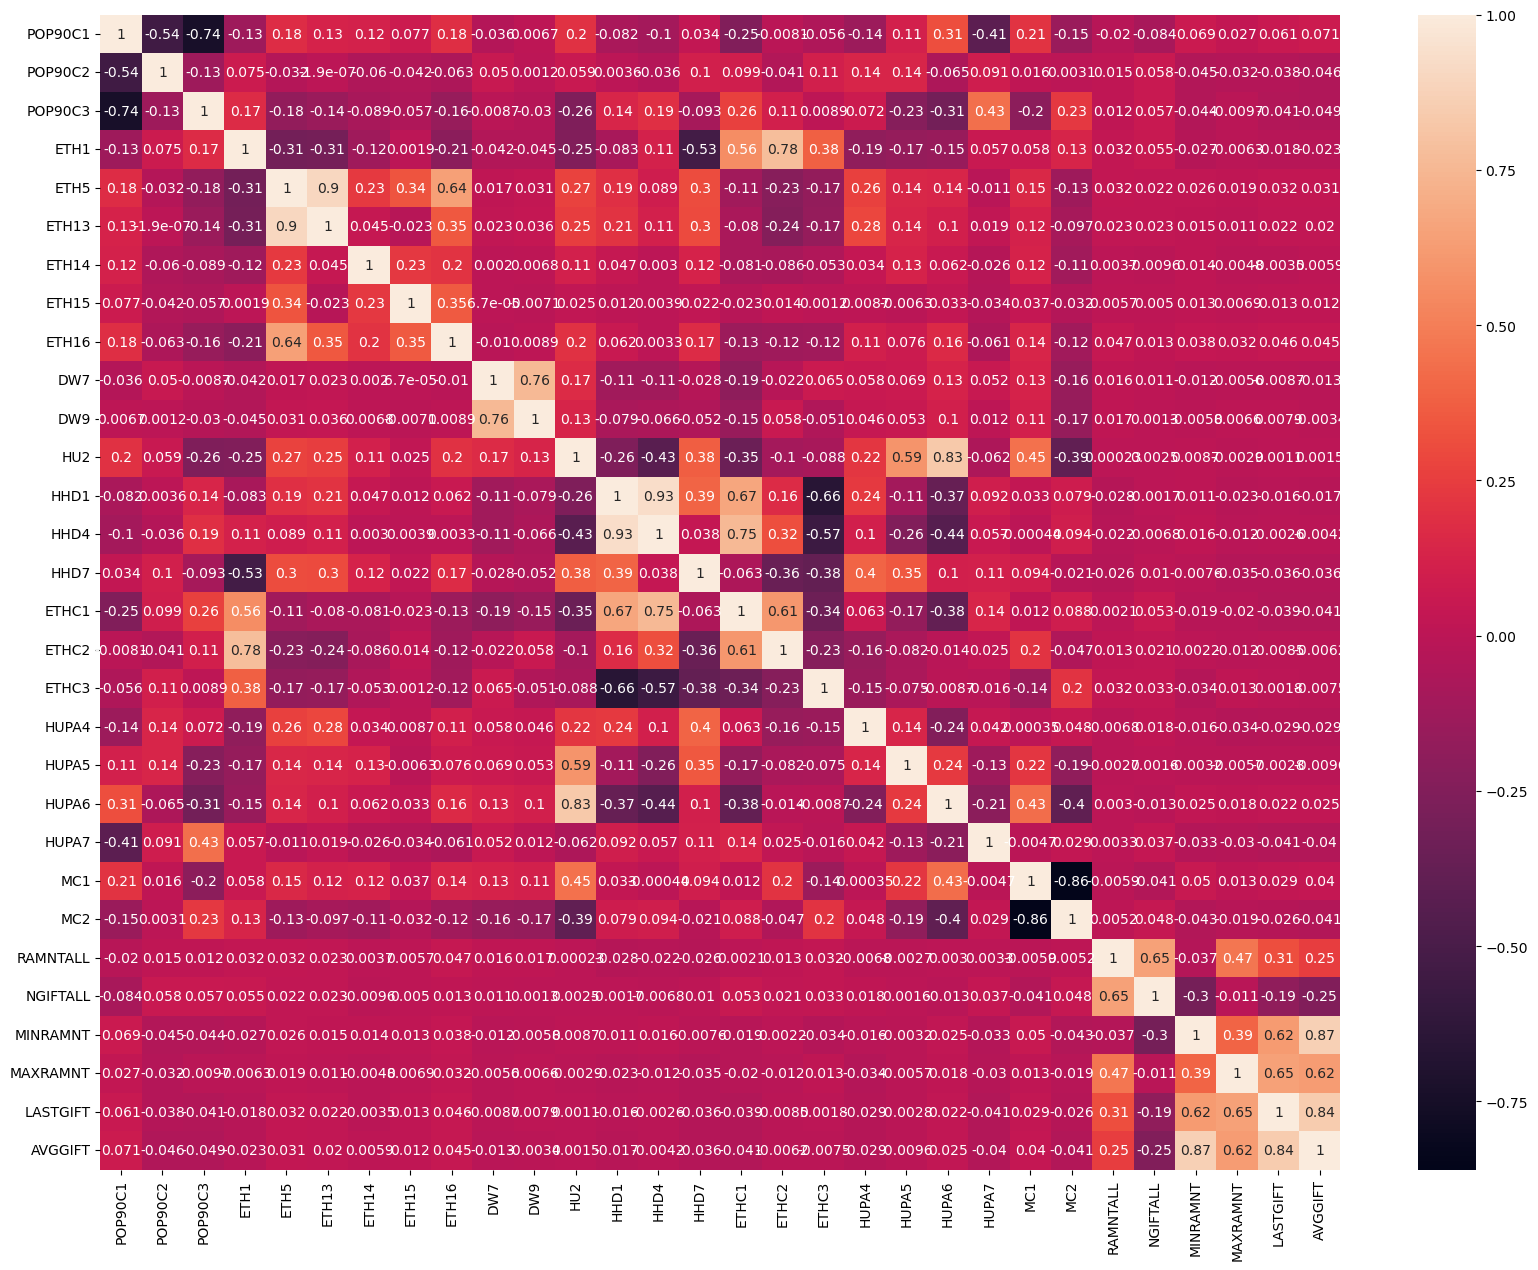

In [149]:
corr_matrix = feature_selection_num.corr(method='pearson')
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr_matrix, annot = True)

In [150]:
feature_selection_num.head()

POP90C1  POP90C2   POP90C3      ETH1      ETH5     ETH13  ETH14  ETH15  \
0  1.00000      0.0  0.000000  0.979798  0.010204  0.010870    0.0    0.0   
1  1.00000      0.0  0.000000  0.949495  0.051020  0.032609    0.0    0.0   
2  0.89899      0.0  0.111111  1.000000  0.010204  0.000000    0.0    0.0   
3  1.00000      0.0  0.000000  0.979798  0.030612  0.021739    0.0    0.0   
4  1.00000      0.0  0.000000  0.070707  0.000000  0.000000    0.0    0.0   

      ETH16       DW7  DW9       HU2      HHD1      HHD4      HHD7     ETHC1  \
0  0.000000  0.080808  0.0  0.121212  0.424242  0.343434  0.137931  0.295775   
1  0.035088  0.000000  0.0  0.030303  0.636364  0.595960  0.068966  0.422535   
2  0.000000  0.000000  0.0  0.040404  0.272727  0.252525  0.034483  0.225352   
3  0.017544  0.000000  0.0  0.373737  0.181818  0.151515  0.068966  0.154930   
4  0.000000  0.000000  0.0  0.111111  0.555556  0.363636  0.327586  0.000000   

      ETHC2     ETHC3     HUPA4     HUPA5     HUPA6  HUPA7       MC1  \
0  0.585859  0.175258  0.050505  0.014085  0.070707    0.0  0.616162   
1  0.606061  0.041237  0.030303  0.000000  0.000000    0.0  0.747475   
2  0.626263  0.216495  0.020202  0.028169  0.000000    0.0  0.616162   
3  0.636364  0.237113  0.202020  0.140845  0.060606    0.0  0.555556   
4  0.030303  0.030928  0.101010  0.000000  0.000000    0.0  0.393939   

        MC2  RAMNTALL  NGIFTALL  MINRAMNT  MAXRAMNT  LASTGIFT   AVGGIFT  
0  0.419355  0.021053  0.155556  0.004444  0.002010  0.011111  0.004033  
1  0.279570  0.024256  0.111111  0.004444  0.005025  0.015556  0.008757  
2  0.419355  0.039817  0.222222  0.006667  0.001005  0.011111  0.005799  
3  0.483871  0.053547  0.122222  0.011111  0.012060  0.022222  0.019518  
4  0.655914  0.036156  0.100000  0.011111  0.007035  0.026667  0.015945

In [151]:
X_processed = np.concatenate((feature_selection_num, encoded_categoricals), axis = 1)

In [152]:
pd.DataFrame(X_processed)

0         1         2         3         4         5    6    7   \
0         1.0       0.0       0.0  0.979798  0.010204   0.01087  0.0  0.0   
1         1.0       0.0       0.0  0.949495   0.05102  0.032609  0.0  0.0   
2     0.89899       0.0  0.111111       1.0  0.010204       0.0  0.0  0.0   
3         1.0       0.0       0.0  0.979798  0.030612  0.021739  0.0  0.0   
4         1.0       0.0       0.0  0.070707       0.0       0.0  0.0  0.0   
...       ...       ...       ...       ...       ...       ...  ...  ...   
4838      0.0       1.0  0.010101  0.949495  0.081633  0.065217  0.0  0.0   
4839      1.0       0.0       0.0  0.909091  0.091837  0.065217  0.0  0.0   
4840      1.0       0.0       0.0  0.858586  0.010204   0.01087  0.0  0.0   
4841      0.0  0.010101       1.0       1.0       0.0       0.0  0.0  0.0   
4842      1.0       0.0       0.0  0.929293  0.081633  0.054348  0.0  0.0   

            8         9         10        11        12        13        14  \
0          0.0  0.080808       0.0  0.121212  0.424242  0.343434  0.137931   
1     0.035088       0.0       0.0  0.030303  0.636364   0.59596  0.068966   
2          0.0       0.0       0.0  0.040404  0.272727  0.252525  0.034483   
3     0.017544       0.0       0.0  0.373737  0.181818  0.151515  0.068966   
4          0.0       0.0       0.0  0.111111  0.555556  0.363636  0.327586   
...        ...       ...       ...       ...       ...       ...       ...   
4838  0.017544  0.060606       0.0  0.434343  0.282828  0.171717  0.189655   
4839  0.035088  0.010101  0.010101  0.282828  0.424242  0.353535   0.12069   
4840  0.017544       0.0       0.0  0.252525  0.292929  0.272727  0.051724   
4841       0.0       0.0       0.0  0.212121  0.454545   0.40404  0.103448   
4842  0.052632  0.050505  0.010101  0.121212  0.444444  0.363636  0.137931   

            15        16        17        18        19        20        21  \
0     0.295775  0.585859  0.175258  0.050505  0.014085  0.070707       0.0   
1     0.422535  0.606061  0.041237  0.030303       0.0       0.0       0.0   
2     0.225352  0.626263  0.216495  0.020202  0.028169       0.0       0.0   
3      0.15493  0.636364  0.237113   0.20202  0.140845  0.060606       0.0   
4          0.0  0.030303  0.030928   0.10101       0.0       0.0       0.0   
...        ...       ...       ...       ...       ...       ...       ...   
4838  0.253521  0.454545  0.309278  0.232323   0.15493  0.080808       0.0   
4839  0.309859  0.575758  0.113402  0.121212  0.042254  0.131313       0.0   
4840  0.197183  0.575758   0.14433  0.020202  0.014085  0.222222       0.0   
4841  0.394366  0.575758  0.154639  0.090909  0.042254  0.070707  0.043478   
4842  0.267606  0.565657  0.164948  0.121212       0.0       0.0       0.0   

            22        23        24        25        26        27        28  \
0     0.616162  0.419355  0.021053  0.155556  0.004444   0.00201  0.011111   
1     0.747475   0.27957  0.024256  0.111111  0.004444  0.005025  0.015556   
2     0.616162  0.419355  0.039817  0.222222  0.006667  0.001005  0.011111   
3     0.555556  0.483871  0.053547  0.122222  0.011111   0.01206  0.022222   
4     0.393939  0.655914  0.036156       0.1  0.011111  0.007035  0.026667   
...        ...       ...       ...       ...       ...       ...       ...   
4838  0.606061  0.430108  0.102092  0.322222  0.000156   0.01206  0.037778   
4839  0.868687  0.150538  0.009153  0.022222  0.011111   0.01005  0.033333   
4840  0.323232  0.731183  0.059039       0.1  0.011111  0.020101  0.044444   
4841  0.383838  0.666667  0.056751  0.122222  0.006667  0.015075  0.044444   
4842  0.434343  0.612903  0.221053  0.444444  0.011111   0.01608      0.04   

            29   30   31   32   33   34   35   36   37   38   39   40   41  \
0     0.004033  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1     0.008757  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
2     0.005799  0.0  1.0  0.0  0.0  0.0  

### Build the model

In [153]:
from sklearn import linear_model
from sklearn.metrics import r2_score

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=100)

In [155]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(3874, 60)

(969, 60)

(3874,)

(969,)

In [164]:
model1 = DecisionTreeRegressor()
model2 = LinearRegression()
model3 = KNeighborsRegressor()

model_pipeline = [model1, model2, model3]
model_names = ['Decision Tree Regressor', 'Linear Regression', 'KNN']
scores = {}
for model, model_name in zip(model_pipeline, model_names):
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_name] = mean_score
print(scores)

{'Decision Tree Regressor': 0.0138816359511861, 'Linear Regression': 0.3402499098922196, 'KNN': 0.16492276992192864}


Linear Regression model seems to be the best model on average.

#### Modeling

In [158]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [165]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train) 
r2_score(y_train, predictions)

0.5338537792265832

In [166]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.5147378258125352

**COMMENT** : The r2 score is ok

What do I need?
- **Column[donates_pred]** that saves the predicted amount of donations
- **Column[pred_amount]** that saves if a person donates or not
- Use the whole cleaned dataset and apply the model there, add variable predicted B, 

### Predictions

In [107]:
final_data_pred_B = pd.read_csv('final_data_y_pred.csv')
final_data_pred_B.head()

0         1         2         3         4         5         6         7  \
0  0.0  0.656566  0.070707  0.131313  0.272727  0.020202  0.050505  0.171717   
1  1.0  0.000000  0.989899  0.989899  0.989899  0.919192  0.919192  0.919192   
2  0.0  0.989899  0.010101  0.060606  0.181818  0.000000  0.020202  0.090909   
3  0.0  0.929293  0.252525  0.505051  0.696970  0.010101  0.080808  0.171717   
4  1.0  0.000000  0.010101  0.020202  0.161616  0.252525  0.585859  0.747475   

     8         9        10        11        12   13   14   15   16   17   18  \
0  0.0  0.313131  0.545455  0.909091  0.404040  0.0  0.0  1.0  1.0  0.0  0.0   
1  1.0  0.979798  1.000000  0.969697  1.000000  0.0  0.0  0.0  1.0  1.0  0.0   
2  1.0  0.505051  0.696970  0.000000  0.171717  0.0  0.0  0.0  0.0  0.0  1.0   
3  1.0  0.393939  0.454545  0.454545  0.222222  0.0  0.0  0.0  0.0  0.0  1.0   
4  1.0  0.060606  0.333333  0.090909  0.212121  0.0  0.0  0.0  0.0  1.0  1.0   

    19   20   21   22   23   24   25   26   27   28   29   30   31   32   33  \
0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
1  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
2  0.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0   
3  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0   
4  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   

    34  0.1  1.1  2.1  3.1  4.1  5.1  6.1  7.1  8.1  9.1  10.1  11.1  12.1  \
0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   
1  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0   0.0   0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0   0.0   0.0   
4  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   0.0   0.0   0.0   

   13.1  14.1  15.1  16.1  17.1  18.1  19.1  20.1  21.1  22.1  23.1  24.1  \
0   0.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
1   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
2   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   

   25.1  26.1  27.1  28.1  29.1  30.1  31.1  32.1  33.1  34.1   35   36   37  \
0   0.0   0.0   1.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0   
1   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0   
2   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0  0.0  0.0  0.0   
3   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0   
4   1.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  0.0   

    38   39   40   41   42   43   44   45   46   47   48   49   50   51  \
0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0   
1  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
2  0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
3  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   

   TARGET_B  pred_TARGET_B  
0         0              1  
1         0              0  
2         0              1  
3         0              1  
4         0              0

In [109]:
data_predictions = pd.concat([numerical, categorical, final_data_pred_B['pred_TARGET_B']], axis = 1)
data_predictions.head()

TCODE        AGE INCOME WEALTH1  HIT  MALEMILI  MALEVET  VIETVETS  \
0      0  60.000000      5       9    0         0       39        34   
1      1  46.000000      6       9   16         0       15        55   
2      1  61.611649      3       1    2         0       20        29   
3      0  70.000000      1       4    2         0       23        14   
4      0  78.000000      3       2   60         1       28         9   

   WWIIVETS  LOCALGOV  STATEGOV  FEDGOV WEALTH2  POP901  POP902  POP903  \
0        18        10         2       1       5     992     264     332   
1        11         6         2       1       9    3611     940     998   
2        33         6         8       1       1    7001    2040    2669   
3        31         3         0       3       0     640     160     219   
4        53        26         3       2       9    2520     627     761   

   POP90C1  POP90C2  POP90C3  POP90C4  POP90C5  ETH1  ETH2  ETH3  ETH4  ETH5  \
0        0       35       65       47       53    92     1     0     0    11   
1       99        0        0       50       50    67     0     0    31     6   
2        0        2       98       49       51    96     2     0     0     2   
3        0        8       92       54       46    61     0     0    11    32   
4       99        0        0       46       54     2    98     0     0     1   

   ETH6  ETH7  ETH8  ETH9  ETH10  ETH11  ETH12  ETH13  ETH14  ETH15  ETH16  \
0     0     0     0     0      0      0      0     11      0      0      0   
1     4     2     6     4     14      0      0      2      0      1      4   
2     0     0     0     0      0      0      0      2      0      0      0   
3     6     2     0     0      0      0      0     31      0      0      1   
4     0     0     0     0      0      0      0      0      0      0      0   

   AGE901  AGE902  AGE903  AGE904  AGE905  AGE906  AGE907  CHIL1  CHIL2  \
0      39      48      51      40      50      54      25     31     42   
1      34      41      43      32      42      45      32     33     46   
2      35      43      46      37      45      49      23     35     40   
3      32      40      44      34      43      47      25     45     35   
4      33      45      50      36      46      50      27     34     43   

   CHIL3  AGEC1  AGEC2  AGEC3  AGEC4  AGEC5  AGEC6  AGEC7  CHILC1  CHILC2  \
0     27     11     14     18     17     13     11     15      12      11   
1     21     13     14     33     23     10      4      2      11      16   
2     25     13     20     19     16     13     10      8      15      14   
3     20     15     25     17     17     12      7      7      20      17   
4     23     14     21     13     15     20     12      5      13      15   

   CHILC3  CHILC4  CHILC5  HHAGE1  HHAGE2  HHAGE3  HHN1  HHN2  HHN3  HHN4  \
0      34      25      18      26      10      23    18    33    49    28   
1      36      22      15      12       1       5     4    21    75    55   
2      30      22      19      25      10      23    21    35    44    22   
3      30      14      19      25      11      23    23    27    50    30   
4      34      19      19      31       7      27    16    26    57    36   

   HHN5  HHN6  MARR1  MARR2  MARR3  MARR4  HHP1  HHP2  DW1  DW2  DW3  DW4  \
0    12     4     61      7     12     19   198   276   97   95    2    2   
1    23     9     69      4      3     24   317   360   99   99    0    0   
2     6     2     63      9      9     19   183   254   69   69    1    6   
3    15     8     63      9      6     23   199   283   85   83    3    4   
4    24    14     42     17      9     33   235   323   99   98    0    0   

   DW5  DW6  DW7  DW8  DW9   HV1   HV2  HV3  HV4  HU1  HU2  HU3  HU4  HU5  \
0    0    0    7    7    0   479   635    3    2   86   14   96    4    7   
1    0    0    0    0    0  5468  5218   12   10   96    4   97    3    9   
2    5    3    3    3    0   497   546    2    1   78   22   93    7   18   
3    1    0    2    0

In [113]:
# From past labs and lessons we know that some.
# column looks more categorical than numerical.
data_predictions['INCOME'] = data_predictions['INCOME'].astype('object')
data_predictions['WEALTH1'] = data_predictions['WEALTH1'].astype('object')
data_predictions['WEALTH2'] = data_predictions['WEALTH2'].astype('object')
data_predictions['HPHONE_D'] = data_predictions['HPHONE_D'].astype('object')
data_predictions['RFA_2F'] = data_predictions['RFA_2F'].astype('object')

#Change categorical columns to object CLUSTER,DOMAIN_B, LASTDATE_YR, LASTDATE_MM:
data_predictions['DOMAIN_B'] = data_predictions['DOMAIN_B'].astype('object')

### Predicted Donor-Split

In [115]:
data_pred_donation = data_predictions[data_predictions['pred_TARGET_B']==1]

In [116]:
display(data_pred_donation.shape)
data_pred_donation.head()

(38143, 323)

TCODE        AGE INCOME WEALTH1  HIT  MALEMILI  MALEVET  VIETVETS  \
0      0  60.000000      5       9    0         0       39        34   
2      1  61.611649      3       1    2         0       20        29   
3      0  70.000000      1       4    2         0       23        14   
6      0  38.000000      4       6    0         0       33        36   
7      0  61.611649      2       9    1         0       34        36   

   WWIIVETS  LOCALGOV  STATEGOV  FEDGOV WEALTH2  POP901  POP902  POP903  \
0        18        10         2       1       5     992     264     332   
2        33         6         8       1       1    7001    2040    2669   
3        31         3         0       3       0     640     160     219   
6        34         7         1       1       3    1067     245     348   
7        12         3         3       1       9    1485     424     512   

   POP90C1  POP90C2  POP90C3  POP90C4  POP90C5  ETH1  ETH2  ETH3  ETH4  ETH5  \
0        0       35       65       47       53    92     1     0     0    11   
2        0        2       98       49       51    96     2     0     0     2   
3        0        8       92       54       46    61     0     0    11    32   
6        0       99        0       46       54    99     0     0     0     1   
7       99        0        0       51       49    96     2     0     1     2   

   ETH6  ETH7  ETH8  ETH9  ETH10  ETH11  ETH12  ETH13  ETH14  ETH15  ETH16  \
0     0     0     0     0      0      0      0     11      0      0      0   
2     0     0     0     0      0      0      0      2      0      0      0   
3     6     2     0     0      0      0      0     31      0      0      1   
6     0     0     0     0      0      0      0      1      0      0      0   
7     0     0     0     0      0      0      0      1      0      0      1   

   AGE901  AGE902  AGE903  AGE904  AGE905  AGE906  AGE907  CHIL1  CHIL2  \
0      39      48      51      40      50      54      25     31     42   
2      35      43      46      37      45      49      23     35     40   
3      32      40      44      34      43      47      25     45     35   
6      35      44      49      40      50      54      25     36     41   
7      28      37      39      30      39      43      32     36     42   

   CHIL3  AGEC1  AGEC2  AGEC3  AGEC4  AGEC5  AGEC6  AGEC7  CHILC1  CHILC2  \
0     27     11     14     18     17     13     11     15      12      11   
2     25     13     20     19     16     13     10      8      15      14   
3     20     15     25     17     17     12      7      7      20      17   
6     23     12     20     18     10      8     10     22      15      14   
7     23     14     28     26     16     10      4      2      15      14   

   CHILC3  CHILC4  CHILC5  HHAGE1  HHAGE2  HHAGE3  HHN1  HHN2  HHN3  HHN4  \
0      34      25      18      26      10      23    18    33    49    28   
2      30      22      19      25      10      23    21    35    44    22   
3      30      14      19      25      11      23    23    27    50    30   
6      35      23      13      24      12      22    25    31    45    27   
7      36      21      14      10       3       9    15    29    56    33   

   HHN5  HHN6  MARR1  MARR2  MARR3  MARR4  HHP1  HHP2  DW1  DW2  DW3  DW4  \
0    12     4     61      7     12     19   198   276   97   95    2    2   
2     6     2     63      9      9     19   183   254   69   69    1    6   
3    15     8     63      9      6     23   199   283   85   83    3    4   
6    11     4     55      8     18     19   182   263   75   73   14   23   
7    11     3     69      9      3     20   227   289   63   62    0   16   

   DW5  DW6  DW7  DW8  DW9   HV1   HV2  HV3  HV4  HU1  HU2  HU3  HU4  HU5  \
0    0    0    7    7    0   479   635    3    2   86   14   96    4    7   
2    5    3    3    3    0   497   546    2    1   78   22   93    7   18   
3    1    0    2    0    2  1000  1263    2    1   48   52   93    7    6   
6    8    3   14   14

In [117]:
# Drop the TARGET_B column
data_pred_donation = data_pred_donation.drop(columns='pred_TARGET_B')

### Data scaling and encoding

In [119]:
#splitting into categorical and numerical
data_pred_donation_num = data_pred_donation.select_dtypes(include = np.number)
data_pred_donation_cat = data_pred_donation.select_dtypes(include = object)

In [180]:
data_pred_donation_num

TCODE        AGE  HIT  MALEMILI  MALEVET  VIETVETS  WWIIVETS  LOCALGOV  \
0          0  60.000000    0         0       39        34        18        10   
2          1  61.611649    2         0       20        29        33         6   
3          0  70.000000    2         0       23        14        31         3   
6          0  38.000000    0         0       33        36        34         7   
7          0  61.611649    1         0       34        36        12         3   
...      ...        ...  ...       ...      ...       ...       ...       ...   
95402      0  61.611649    0         0       20        21        63         7   
95404      2  53.000000    0         0       24        31        28         9   
95406      0  50.000000   10         2       44        26        46        25   
95409      1  60.000000    0         0       18        46        20         7   
95410      0  58.000000    0         0       28        35        20         9   

       STATEGOV  FEDGOV  POP901  POP902  POP903  POP90C1  POP90C2  POP90C3  \
0             2       1     992     264     332        0       35       65   
2             8       1    7001    2040    2669        0        2       98   
3             0       3     640     160     219        0        8       92   
6             1       1    1067     245     348        0       99        0   
7             3       1    1485     424     512       99        0        0   
...         ...     ...     ...     ...     ...      ...      ...      ...   
95402         8       7     938     266     318        0       84       16   
95404         9       2   10214    2850    3516        0       17       83   
95406         9       1    1834     529     628        0        0       99   
95409        23       0     552     131     205       99        0        0   
95410         1       1    1746     432     508       99        0        0   

       POP90C4  POP90C5  ETH1  ETH2  ETH3  ETH4  ETH5  ETH6  ETH7  ETH8  ETH9  \
0           47       53    92     1     0     0    11     0     0     0     0   
2           49       51    96     2     0     0     2     0     0     0     0   
3           54       46    61     0     0    11    32     6     2     0     0   
6           46       54    99     0     0     0     1     0     0     0     0   
7           51       49    96     2     0     1     2     0     0     0     0   
...        ...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
95402       49       51    96     2     0     1     0     0     0     0     1   
95404       49       51    98     2     0     0     0     0     0     0     0   
95406       49       51    88     8     1     1     3     0     0     0     0   
95409       53       47    82    14     0     1     9     0     0     0     0   
95410       47       53    92     1     1     5     8     0     1     2     0   

       ETH10  ETH11  ETH12  ETH13  ETH14  ETH15  ETH16  AGE901  AGE902  \
0          0      0      0     11      0      0      0      39      48   
2          0      0      0      2      0      0      0      35      43   
3          0      0      0     31      0      0      1      32      40   
6          0      0      0      1      0      0      0      35      44   
7          0      0      0      1      0      0      1      28      37   
...      ...    ...    ...    ...    ...    ...    ...     ...     ...   
95402      0      0      0      0      0      0      0      34      42   
95404      0      0      0      0      0      0      0      31      39   
95406      1      0      0      2      0      0      1      38      45   
95409      0      0      0      9      0      0      0      28      35   
95410      1      0      0      5      0      0      3      34      42   

       AGE903  AGE904  AGE905  AGE906  AGE907  CHIL1  CHIL2  CHIL3  AGEC1  \
0          51      40      50      54      25     31     42     27     11   
2          46      37      45      49      23     35     40     25     13   
3   

In [188]:
data_pred_donation_num = data_pred_donation_num[['POP90C1', 'POP90C2', 'POP90C3', 'ETH1', 'ETH5', 'ETH13', 'ETH14',
       'ETH15', 'ETH16', 'DW7', 'DW9', 'HU2', 'HHD1', 'HHD4', 'HHD7', 'ETHC1',
       'ETHC2', 'ETHC3', 'HUPA4', 'HUPA5', 'HUPA6', 'HUPA7', 'MC1', 'MC2',
       'RAMNTALL', 'NGIFTALL', 'MINRAMNT', 'MAXRAMNT', 'LASTGIFT', 'AVGGIFT']]

In [189]:
# Transformation on numericals:
# Normalizing data: make data range from 0 - 1, instead of from min to max
transformer = MinMaxScaler().fit(data_pred_donation_num)
data_pred_donation_num_scaled = transformer.transform(data_pred_donation_num)
data_pred_donation_num_scaled = pd.DataFrame(data_pred_donation_num_scaled, columns=data_pred_donation_num.columns)

In [190]:
data_pred_donation_num_scaled

POP90C1   POP90C2   POP90C3      ETH1      ETH5     ETH13  ETH14  \
0          0.0  0.353535  0.656566  0.929293  0.111111  0.113402    0.0   
1          0.0  0.020202  0.989899  0.969697  0.020202  0.020619    0.0   
2          0.0  0.080808  0.929293  0.616162  0.323232  0.319588    0.0   
3          0.0  1.000000  0.000000  1.000000  0.010101  0.010309    0.0   
4          1.0  0.000000  0.000000  0.969697  0.020202  0.010309    0.0   
...        ...       ...       ...       ...       ...       ...    ...   
38138      0.0  0.848485  0.161616  0.969697  0.000000  0.000000    0.0   
38139      0.0  0.171717  0.838384  0.989899  0.000000  0.000000    0.0   
38140      0.0  0.000000  1.000000  0.888889  0.030303  0.020619    0.0   
38141      1.0  0.000000  0.000000  0.828283  0.090909  0.092784    0.0   
38142      1.0  0.000000  0.000000  0.929293  0.080808  0.051546    0.0   

       ETH15     ETH16       DW7       DW9       HU2      HHD1      HHD4  \
0        0.0  0.000000  0.070707  0.000000  0.141414  0.383838  0.323232   
1        0.0  0.000000  0.030303  0.000000  0.222222  0.363636  0.303030   
2        0.0  0.014286  0.020202  0.022222  0.525253  0.363636  0.303030   
3        0.0  0.000000  0.141414  0.000000  0.363636  0.414141  0.353535   
4        0.0  0.014286  0.000000  0.000000  0.242424  0.545455  0.444444   
...      ...       ...       ...       ...       ...       ...       ...   
38138    0.0  0.000000  0.050505  0.000000  0.202020  0.434343  0.383838   
38139    0.0  0.000000  0.010101  0.000000  0.242424  0.474747  0.363636   
38140    0.0  0.014286  0.060606  0.066667  0.131313  0.353535  0.303030   
38141    0.0  0.000000  0.000000  0.000000  0.343434  0.373737  0.212121   
38142    0.0  0.042857  0.050505  0.011111  0.121212  0.444444  0.363636   

           HHD7     ETHC1     ETHC2     ETHC3     HUPA4     HUPA5     HUPA6  \
0      0.060606  0.239437  0.505051  0.252525  0.141414  0.011905  0.000000   
1      0.070707  0.239437  0.606061  0.181818  0.111111  0.023810  0.030303   
2      0.060606  0.183099  0.363636  0.131313  0.424242  0.047619  0.000000   
3      0.050505  0.295775  0.515152  0.272727  0.151515  0.202381  0.030303   
4      0.090909  0.366197  0.646465  0.070707  0.060606  0.083333  0.080808   
...         ...       ...       ...       ...       ...       ...       ...   
38138  0.050505  0.267606  0.606061  0.161616  0.191919  0.000000  0.000000   
38139  0.101010  0.323944  0.606061  0.151515  0.111111  0.035714  0.040404   
38140  0.060606  0.211268  0.565657  0.171717  0.070707  0.011905  0.000000   
38141  0.161616  0.281690  0.494949  0.121212  0.313131  0.023810  0.000000   
38142  0.080808  0.267606  0.565657  0.161616  0.121212  0.000000  0.000000   

          HUPA7       MC1       MC2  RAMNTALL  NGIFTALL  MINRAMNT  MAXRAMNT  \
0      0.000000  0.464646  0.545455  0.023965  0.319149  0.094340  0.001401   
1      0.060606  0.383838  0.626263  0.019954  0.276596  0.037736  0.002202   
2      0.050505  0.464646  0.545455  0.010135  0.159574  0.037736  0.001201   
3      0.010101  0.555556  0.454545  0.009924  0.138298  0.056604  0.001401   
4      0.030303  0.464646  0.545455  0.001900  0.042553  0.094340  0.001201   
...         ...       ...       ...       ...       ...       ...       ...   
38138  0.020202  0.444444  0.565657  0.002745  0.031915  0.150943  0.001201   
38139  0.050505  0.323232  0.686869  0.004856  0.095745  0.056604  0.001201   
38140  0.040404  0.444444  0.565657  0.007179  0.244681  0.037736  0.000801   
38141  0.000000  0.434343  0.575758  0.004751  0.063830  0.056604  0.001001   
38142  0.000000  0.434343  0.575758  0.051204  0.425532  0.094340  0.003203   

       LASTGIFT   AVGGIFT  
0         0.040  0.006816  
1         0.020  0.006541  
2         0.040  0.005835  
3         0.044  0.006711  
4         0.044  0.005188  
...         ...       ...  
38138     0.044  0.008936  
38139     0.032  0.004871  
38140     0.008  0.002206  
38141     0.040

In [191]:
# # Ordinal Encoding
ordinal_data_pred_donation_cat = data_pred_donation_cat[['INCOME', 'WEALTH2', 'DOMAIN_B']]
display(ordinal_data_pred_donation_cat.shape)
ordinal_data_pred_donation_cat.head()

(38143, 3)

INCOME WEALTH2 DOMAIN_B
0      5       5        2
2      3       1        2
3      1       0        2
6      4       3        2
7      2       9        2

In [197]:
onehot_data_pred_donation_cat= data_pred_donation_cat.drop(['INCOME', 'WEALTH2', 'DOMAIN_B', 'WEALTH1', 'HPHONE_D'], axis = 1)
display(onehot_data_pred_donation_cat.shape)
onehot_data_pred_donation_cat.head()

(38143, 7)

RFA_2F  STATE HOMEOWNR GENDER RFA_2A GEOCODE2 DOMAIN_A
0      4     IL        H      F      E        C        T
2      4     NC        U      M      E        C        R
3      4     CA        U      F      E        C        R
6      1     IN        H      F      E        D        T
7      3  other        U      F      E        C        T

In [198]:
# ONEHOT Encoding:
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(onehot_data_pred_donation_cat)

data_pred_donation_cat_encoded = encoder.transform(onehot_data_pred_donation_cat).toarray()


In [199]:
# Combine train and test-data
data_pred_donation_processed = np.concatenate((ordinal_data_pred_donation_cat, data_pred_donation_cat_encoded, data_pred_donation_num_scaled),axis=1)

In [200]:
pd.DataFrame(data_pred_donation_processed)

0  1  2    3    4    5    6    7    8    9    10   11   12   13   14  \
0      5  5  2  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      3  1  2  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
2      1  0  2  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      4  3  2  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
4      2  9  2  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...   .. .. ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
38138  5  9  3  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
38139  1  3  2  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
38140  6  6  2  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
38141  5  9  3  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
38142  7  7  1  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

        15   16   17   18   19   20   21   22   23   24   25   26   27   28  \
0      0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
1      0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0   
2      0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
4      0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
38138  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0   
38139  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0   
38140  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
38141  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
38142  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

        29   30        31        32        33        34        35   36   37  \
0      0.0  0.0  0.353535  0.656566  0.929293  0.111111  0.113402  0.0  0.0   
1      0.0  0.0  0.020202  0.989899  0.969697  0.020202  0.020619  0.0  0.0   
2      0.0  0.0  0.080808  0.929293  0.616162  0.323232  0.319588  0.0  0.0   
3      0.0  0.0       1.0       0.0       1.0  0.010101  0.010309  0.0  0.0   
4      0.0  1.0       0.0       0.0  0.969697  0.020202  0.010309  0.0  0.0   
...    ...  ...       ...       ...       ...       ...       ...  ...  ...   
38138  0.0  0.0  0.848485  0.161616  0.969697       0.0       0.0  0.0  0.0   
38139  0.0  0.0  0.171717  0.838384  0.989899       0.0       0.0  0.0  0.0   
38140  0.0  0.0       0.0       1.0  0.888889  0.030303  0.020619  0.0  0.0   
38141  0.0  1.0       0.0       0.0  0.828283  0.090909  0.092784  0.0  0.0   
38142  0.0  1.0       0.0       0.0  0.929293  0.080808  0.051546  0.0  0.0   

             38        39        40        41        42        43        44  \
0           0.0  0.070707       0.0  0.141414  0.383838  0.323232  0.060606   
1           0.0  0.030303       0.0  0.222222  0.363636   0.30303  0.070707   
2      0.014286  0.020202  0.022222  0.525253  0.363636   0.30303  0.060606   
3           0.0  0.141414       0.0  0.363636  0.414141  0.353535  0.050505   
4      0.014286       0.0       0.0  0.242424  0.545455  0.444444  0.090909   
...         ...       ...       ...       ...       ...       ...       ...   
38138       0.0  0.050505       0.0   0.20202  0.434343  0.383838  0.050505   
38139       0.0  0.010101       0.0  0.242424  0.474747  0.363636   0.10101   
38140  0.014286  0.060606  0.066667  0.131313  0.353535   0.30303  0.060606   
38141       0.0       0.0       0.0  0.343434  0.373737  0.212121  0.161616   
38142  0.042857  0.050505  0.011111  0.121212  0.444444  0.363636  0.080808   

             45        46        47        48        49        50        51  \
0      0.239437  0.505051  0.252525  0.141414  0.011905       0.0       0.0   
1      0.239437  0.606061  0.181818  0.111111   0.02381  0.03030

### Predictions of the donation amount of the predicted donors

In [201]:
predicted_donation = lm.predict(data_pred_donation_processed)

In [203]:
total_revenue = sum(predicted_donation) - len(data_predictions[data_predictions['pred_TARGET_B']==1]['pred_TARGET_B'])*0.68
total_revenue

-201884.94227832396

### Conclusion
We predict a total revenue of -201'884$.